## 1 - Perkenalan

Name    : Suartina Sitanggang

Batch   : FTDS - 025

Objective: Dalam penelitian ini, saya menggunakan K-Means Clustering dengan k=3, dipilih berdasarkan Elbow Method dan Silhouette Score. Metrik evaluasi utama yang digunakan adalah WCSS (Elbow Method) dan Silhouette Score untuk memastikan pemisahan cluster yang jelas. Model ini efektif dalam mengelompokkan pelanggan berdasarkan pola penggunaan kartu kredit, sehingga dapat digunakan untuk strategi pemasaran yang lebih personal dan efektif.

## 2 - Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#Splitting between train and test
from sklearn.model_selection import train_test_split

# Statistik
from scipy.stats import skew

```
Data fields
Here's a brief version of what you'll find in the data description file.

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
MSSubClass: The building class
MSZoning: The general zoning classification
LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet
Street: Type of road access
Alley: Type of alley access
LotShape: General shape of property
LandContour: Flatness of the property
Utilities: Type of utilities available
LotConfig: Lot configuration
LandSlope: Slope of property
Neighborhood: Physical locations within Ames city limits
Condition1: Proximity to main road or railroad
Condition2: Proximity to main road or railroad (if a second is present)
BldgType: Type of dwelling
HouseStyle: Style of dwelling
OverallQual: Overall material and finish quality
OverallCond: Overall condition rating
YearBuilt: Original construction date
YearRemodAdd: Remodel date
RoofStyle: Type of roof
RoofMatl: Roof material
Exterior1st: Exterior covering on house
Exterior2nd: Exterior covering on house (if more than one material)
MasVnrType: Masonry veneer type
MasVnrArea: Masonry veneer area in square feet
ExterQual: Exterior material quality
ExterCond: Present condition of the material on the exterior
Foundation: Type of foundation
BsmtQual: Height of the basement
BsmtCond: General condition of the basement
BsmtExposure: Walkout or garden level basement walls
BsmtFinType1: Quality of basement finished area
BsmtFinSF1: Type 1 finished square feet
BsmtFinType2: Quality of second finished area (if present)
BsmtFinSF2: Type 2 finished square feet
BsmtUnfSF: Unfinished square feet of basement area
TotalBsmtSF: Total square feet of basement area
Heating: Type of heating
HeatingQC: Heating quality and condition
CentralAir: Central air conditioning
Electrical: Electrical system
1stFlrSF: First Floor square feet
2ndFlrSF: Second floor square feet
LowQualFinSF: Low quality finished square feet (all floors)
GrLivArea: Above grade (ground) living area square feet
BsmtFullBath: Basement full bathrooms
BsmtHalfBath: Basement half bathrooms
FullBath: Full bathrooms above grade
HalfBath: Half baths above grade
Bedroom: Number of bedrooms above basement level
Kitchen: Number of kitchens
KitchenQual: Kitchen quality
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
Functional: Home functionality rating
Fireplaces: Number of fireplaces
FireplaceQu: Fireplace quality
GarageType: Garage location
GarageYrBlt: Year garage was built
GarageFinish: Interior finish of the garage
GarageCars: Size of garage in car capacity
GarageArea: Size of garage in square feet
GarageQual: Garage quality
GarageCond: Garage condition
PavedDrive: Paved driveway
WoodDeckSF: Wood deck area in square feet
OpenPorchSF: Open porch area in square feet
EnclosedPorch: Enclosed porch area in square feet
3SsnPorch: Three season porch area in square feet
ScreenPorch: Screen porch area in square feet
PoolArea: Pool area in square feet
PoolQC: Pool quality
Fence: Fence quality
MiscFeature: Miscellaneous feature not covered in other categories
MiscVal: $Value of miscellaneous feature
MoSold: Month Sold
YrSold: Year Sold
SaleType: Type of sale
SaleCondition: Condition of sale

## 3 - Data Loading

In [3]:
# Load data
df_train = pd.read_csv("train.csv")

# Menampilkan semua kolom
pd.set_option('display.max_rows', None)  # Menampilkan semua baris
pd.set_option('display.max_columns', None)  # Menampilkan semua kolom
pd.set_option('display.expand_frame_repr', False)  # Mencegah pemotongan tampilan
df_train.head() # Menampilkan beberapa baris awal dengan semua kolom


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Load data
df_test = pd.read_csv("test.csv")

# Menampilkan semua kolom
pd.set_option("display.max_columns", None)

# Menampilkan beberapa baris awal dengan semua kolom
df_test.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## 4 - Exploratory Data Analysis (EDA)

In [5]:
# Menampilkan semua baris
pd.set_option("display.max_rows", None) 

# Menampilkan semua kolom
pd.set_option("display.max_columns", None)  

# Menampilkan summary data train
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Terdapat 1460 baris data dan 81 kolom dengan 13 kolom bertipe data float, 35 kolom bertipe integer, dan 43 bertipe objek. Untuk missing value terdapat pada kolom LotFrontage, dan Alley.

In [6]:
# Melihat data hanya kolom numerik
df_train.select_dtypes(include=["int64", "float64"]).info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [7]:
# Melihat data hanya kolom kategorik
df_train.select_dtypes(include=["object"]).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     588 non-null    object
 18  ExterQual      1460 non-null

In [8]:
# Menampilkan summary data test
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [9]:
# Melihat ringkasan statistik dari data df_train
df_train.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,1460.0,NaN,NaN,NaN,730.5,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,NaN,NaN,NaN,56.89726,42.300571,20.0,20.0,50.0,70.0,190.0
MSZoning,1460,5,RL,1151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,1201.0,NaN,NaN,NaN,70.049958,24.284752,21.0,59.0,69.0,80.0,313.0
LotArea,1460.0,NaN,NaN,NaN,10516.828082,9981.264932,1300.0,7553.5,9478.5,11601.5,215245.0
Street,1460,2,Pave,1454,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alley,91,2,Grvl,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotShape,1460,4,Reg,925,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LandContour,1460,4,Lvl,1311,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Utilities,1460,2,AllPub,1459,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Melihat ringkasan statistik dari data df_test
df_test.describe(include="all").T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,1459.0,NaN,NaN,NaN,2190.0,421.321334,1461.0,1825.5,2190.0,2554.5,2919.0
MSSubClass,1459.0,NaN,NaN,NaN,57.378341,42.74688,20.0,20.0,50.0,70.0,190.0
MSZoning,1455,5,RL,1114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,1232.0,NaN,NaN,NaN,68.580357,22.376841,21.0,58.0,67.0,80.0,200.0
LotArea,1459.0,NaN,NaN,NaN,9819.161069,4955.517327,1470.0,7391.0,9399.0,11517.5,56600.0
Street,1459,2,Pave,1453,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alley,107,2,Grvl,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotShape,1459,4,Reg,934,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LandContour,1459,4,Lvl,1311,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Utilities,1457,1,AllPub,1457,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Cek nama kolom apakah terdapat spasi
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [12]:
# Cek nama kolom apakah terdapat spasi
df_test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Tidak terdapat white space pada nama kolom-kolom baik di data train maupun di test

In [13]:
# cek data duplicate
duplicate_train= df_train.duplicated()
duplicate_train

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39      False
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68      False
69      False
70      False
71    

In [14]:
# Cari jumlah data duplikatnya
duplicate_train.sum()

0

In [15]:
# cek data duplicate
duplicate_test= df_test.duplicated()
duplicate_test

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39      False
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68      False
69      False
70      False
71    

In [16]:
# Cari jumlah data duplikatnya
duplicate_test.sum()

0

In [17]:
# Mengecek proporsi missing values di setiap kolom
df_train.isnull().mean()

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
Street           0.000000
Alley            0.937671
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.597260
MasVnrArea       0.005479
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.025342
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinType1     0.025342
BsmtFinSF1       0.000000
BsmtFinType2     0.026027
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF 

In [18]:
# Mengecek proporsi missing values di setiap kolom
df_test.isnull().mean()

Id               0.000000
MSSubClass       0.000000
MSZoning         0.002742
LotFrontage      0.155586
LotArea          0.000000
Street           0.000000
Alley            0.926662
LotShape         0.000000
LandContour      0.000000
Utilities        0.001371
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000685
Exterior2nd      0.000685
MasVnrType       0.612748
MasVnrArea       0.010281
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.030158
BsmtCond         0.030843
BsmtExposure     0.030158
BsmtFinType1     0.028787
BsmtFinSF1       0.000685
BsmtFinType2     0.028787
BsmtFinSF2       0.000685
BsmtUnfSF        0.000685
TotalBsmtSF 

Data tidak ada yang terduplikat.

In [19]:
# Melihat ringkasan statistik dari kolom SalePrice
df_train.SalePrice.describe()


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Harga rumah dalam dataset ini bervariasi cukup luas, dengan rata-rata sekitar $180,921. Ada rumah yang harganya sangat murah, sekitar $34,900, hingga yang sangat mahal mencapai $755,000. Sebagian besar rumah dijual di kisaran $130,000 - $215,000, di mana setengahnya berharga di bawah $163,000. Namun, ada juga beberapa rumah mewah dengan harga tinggi yang membuat rata-rata tampak lebih besar. Bisa dibilang, pasar perumahan di dataset ini cukup beragam, dengan sebagian besar rumah berada dalam rentang harga yang wajar, tetapi ada juga beberapa properti eksklusif dengan harga yang jauh di atas rata-rata.

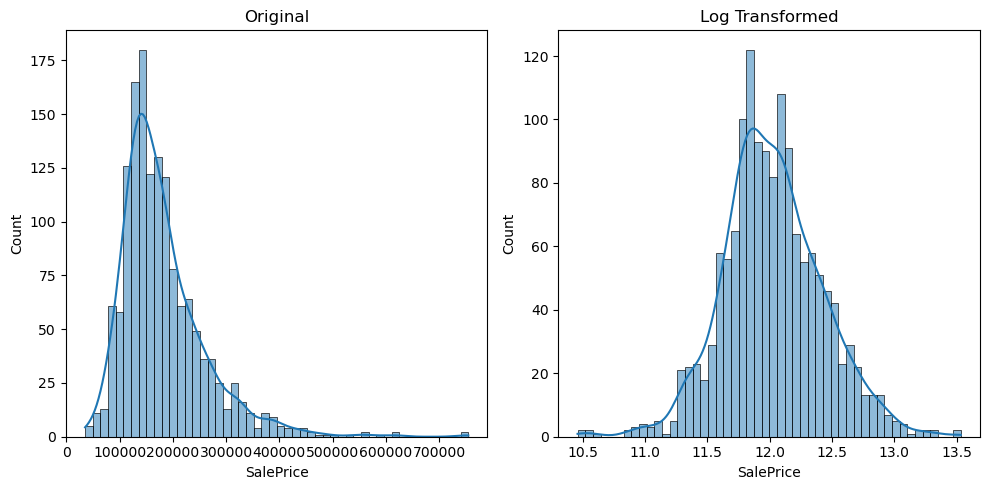

In [20]:
# Mengatur ukuran gambar
plt.figure(figsize=(10,5))

# Plot pertama: Distribusi asli
plt.subplot(1,2,1)
sns.histplot(df_train.SalePrice, bins=50, kde=True)
plt.title('Original')

# Plot kedua: Distribusi setelah log transformasi
plt.subplot(1,2,2)
sns.histplot(np.log1p(df_train.SalePrice), bins=50, kde=True)
plt.title('Log Transformed')

# Menampilkan gambar
plt.tight_layout()
plt.show()

Sebelum dilakukan transformasi, distribusi harga rumah terlihat condong ke kanan, dengan sebagian besar rumah memiliki harga yang relatif rendah dan beberapa rumah dengan harga sangat tinggi yang menarik rata-rata ke atas. Hal ini bisa menjadi masalah dalam analisis karena data yang tidak terdistribusi normal dapat mempengaruhi akurasi model prediksi. Setelah diterapkan transformasi logaritmik, distribusi harga rumah menjadi lebih simetris dan menyerupai bentuk lonceng (normal), yang membuatnya lebih mudah dianalisis dan diprediksi. Dengan cara ini, model machine learning atau regresi yang digunakan bisa lebih akurat dan tidak terlalu dipengaruhi oleh outlier atau harga ekstrem.

In [21]:
# Cek nili skewness pada kolom salesprice
df_train.SalePrice.skew()

1.8828757597682129

In [22]:
# Cek nili skewness pada kolom salesprice
df_train.SalePrice.kurtosis()

6.536281860064529

Harga rumah dalam dataset ini tidak tersebar secara merata. Nilai skewness sebesar 1.88 menunjukkan bahwa distribusinya condong ke kanan, artinya ada beberapa rumah dengan harga yang jauh lebih tinggi dibandingkan mayoritas lainnya. Sementara itu, nilai kurtosis yang mencapai 6.54 mengindikasikan bahwa distribusi ini memiliki puncak yang lebih tajam dan ekor yang lebih panjang dibandingkan distribusi normal, yang berarti terdapat banyak outlier atau rumah dengan harga ekstrem. Kondisi ini bisa membuat analisis menjadi kurang akurat jika langsung digunakan, sehingga biasanya dilakukan transformasi data, seperti log transform, untuk membuat distribusi lebih seimbang dan mendekati normal.

## 5 - Feature Engineering

### 5.1 Concat df_train dan df_test

Penggabungan df_train dan df_test untuk menerapkan transformasi pada data.

In [23]:
# Menggabungkan data train dan test
df = pd.concat([df_train, df_test], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

### 5.2 Split data Target dan Features

In [24]:
# Mengambil data selain kolom SalePrice
X = df.drop(["SalePrice"],axis=1) 

# Mengambil data kolom SalePrice
y = df.SalePrice 
# Menampilkan data
y

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
5       143000.0
6       307000.0
7       200000.0
8       129900.0
9       118000.0
10      129500.0
11      345000.0
12      144000.0
13      279500.0
14      157000.0
15      132000.0
16      149000.0
17       90000.0
18      159000.0
19      139000.0
20      325300.0
21      139400.0
22      230000.0
23      129900.0
24      154000.0
25      256300.0
26      134800.0
27      306000.0
28      207500.0
29       68500.0
30       40000.0
31      149350.0
32      179900.0
33      165500.0
34      277500.0
35      309000.0
36      145000.0
37      153000.0
38      109000.0
39       82000.0
40      160000.0
41      170000.0
42      144000.0
43      130250.0
44      141000.0
45      319900.0
46      239686.0
47      249700.0
48      113000.0
49      127000.0
50      177000.0
51      114500.0
52      110000.0
53      385000.0
54      130000.0
55      180500.0
56      172500.0
57      196500.0
58      438780

In [25]:
# Menampilkan data 
X.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal


### 5.3 Split data Menjadi Numerik dan Kategorik

Memisahkan kolom numerik dan kategorikal

In [26]:
# Menampilkan nama-nama pada kolom X
X.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [27]:
# Hanya tipe data kategorikal
X_cat = X.select_dtypes(include=['object']) 
# Hanya tipe data numerik
X_num = X.select_dtypes(include=["int64", "float64"]) 

# Menampilkan data
print(f"Kolom kategorik: {list(X_cat.columns)}")  # Konversi ke list agar bisa dicetak
print(f"Kolom numerik: {list(X_num.columns)}")

Kolom kategorik: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
Kolom numerik: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea'

In [28]:
# Menghitung jumlah kolom kategorikal
len(X_cat.columns)

43

In [29]:
# Menghitung jumlah kolom numerik
len(X_num.columns)

37

### 5.4 Cardinality handling

Untuk proses selanjutnya menangani variabel kategori dengan jumlah nilai unik yang tinggi (high cardinality) dalam dataset.

In [30]:
# Membuat perulangan di dalam kolom kategori
for i in X_cat:
    print(f'Jumlah unique value dari kolom {i} : {X[i].nunique()}') # menghitung data yg unik dari kolom kategori
    print(f'Unique value dari kolom {i} : {X[i].unique()}') # menampilkan data kategori yang unik
    print('')

Jumlah unique value dari kolom MSZoning : 5
Unique value dari kolom MSZoning : ['RL' 'RM' 'C (all)' 'FV' 'RH' nan]

Jumlah unique value dari kolom Street : 2
Unique value dari kolom Street : ['Pave' 'Grvl']

Jumlah unique value dari kolom Alley : 2
Unique value dari kolom Alley : [nan 'Grvl' 'Pave']

Jumlah unique value dari kolom LotShape : 4
Unique value dari kolom LotShape : ['Reg' 'IR1' 'IR2' 'IR3']

Jumlah unique value dari kolom LandContour : 4
Unique value dari kolom LandContour : ['Lvl' 'Bnk' 'Low' 'HLS']

Jumlah unique value dari kolom Utilities : 2
Unique value dari kolom Utilities : ['AllPub' 'NoSeWa' nan]

Jumlah unique value dari kolom LotConfig : 5
Unique value dari kolom LotConfig : ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']

Jumlah unique value dari kolom LandSlope : 3
Unique value dari kolom LandSlope : ['Gtl' 'Mod' 'Sev']

Jumlah unique value dari kolom Neighborhood : 25
Unique value dari kolom Neighborhood : ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst'

### 5.5  Split between Train set and Test set

In [31]:
#Splitting between train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# menampilkan dimensi data
print('Train Size: ', X_train.shape) 
# menampilkan dimensi data
print('Test Size: ', X_test.shape) 

Train Size:  (2335, 80)
Test Size:  (584, 80)


In [32]:
###  5.6 Handle missing value

In [33]:
X_train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            1
LotFrontage       377
LotArea             0
Street              0
Alley            2187
LotShape            0
LandContour         0
Utilities           1
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType       1416
MasVnrArea         21
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           62
BsmtCond           62
BsmtExposure       62
BsmtFinType1       60
BsmtFinSF1          1
BsmtFinType2       60
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [34]:
X_test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           3
LotFrontage      109
LotArea            0
Street             0
Alley            534
LotShape           0
LandContour        0
Utilities          1
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType       350
MasVnrArea         2
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          19
BsmtCond          20
BsmtExposure      20
BsmtFinType1      19
BsmtFinSF1         0
BsmtFinType2      20
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [35]:
y_train.isnull().sum()

1166

In [36]:
y_test.isnull().sum()

293

In [37]:
# Membuat fungsi untuk cek nilai skew
def hasil_skewness(df_num, *nama_kolom):
    return {col: df_num[col].skew() for col in nama_kolom if col in df_num.columns}

In [38]:
# Membuat variabel untuk hasil skewness
skewness_hasil = hasil_skewness(df_num, 'Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 
                                'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 
                                'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 
                                'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold')

# Print hasil skewness
for col, skewness in skewness_hasil.items():
    print(f"{col}: {skewness}")



NameError: name 'df_num' is not defined

In [ ]:
# Initialize empty lists for each skewness category
normal_columns = []
skewed_columns = []
extreme_skewed_columns = []

# Loop through the skewness values and categorize the columns
for col, skewness in skewness_hasil.items():
    if skewness < -1.0 or skewness > 1.0:
        extreme_skewed_columns.append(col)
    elif abs(skewness) <= 0.5: # sama aja dgn -0.5 <= skewness <= 0.5
        normal_columns.append(col)
    else:
        skewed_columns.append(col)

# Print the columns in each category
print(f"Normal: {normal_columns}\nSkewed: {skewed_columns}\nExtreme Skewed: {extreme_skewed_columns}")

Normal: ['Id', 'OverallQual', 'YearRemodAdd', 'FullBath', 'BedroomAbvGr', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'MoSold', 'YrSold']
Skewed: ['OverallCond', 'YearBuilt', 'BsmtUnfSF', '2ndFlrSF', 'BsmtFullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces']
Extreme Skewed: ['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath', 'KitchenAbvGr', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


In [ ]:
# Create function to calculate outlier percentages for normal distribution
def calculate_outlier_percentages_normal(df_num, columns):
    for variable in columns:
        std = df_num[variable].std()
        lower_boundary = df_num[variable].quantile(0.25) - (std * 3)
        upper_boundary = df[variable].quantile(0.75) + (std * 3)

        outliers = df_num[(df_num[variable] < lower_boundary) | (df_num[variable] > upper_boundary)]
        outlier_percentage = len(outliers) / len(df_num) * 100 # perhitungan persentase outlier

        print('Percentage of outliers in {}: {:.2f}%'.format(variable, outlier_percentage))

# Calcuate outlier percentages before handling
print(calculate_outlier_percentages_normal(df_num, normal_columns))

Percentage of outliers in Id: 0.00%
Percentage of outliers in OverallQual: 0.00%
Percentage of outliers in YearRemodAdd: 0.00%
Percentage of outliers in FullBath: 0.14%
Percentage of outliers in BedroomAbvGr: 0.75%
Percentage of outliers in GarageYrBlt: 0.03%
Percentage of outliers in GarageCars: 0.03%
Percentage of outliers in GarageArea: 0.27%
Percentage of outliers in MoSold: 0.00%
Percentage of outliers in YrSold: 0.00%
None


In [ ]:
# Create function to calculate outlier percentages for skew
def calculate_outlier_percentages_skew(df_num, columns, distance):
    for variable in columns:
        IQR = df_num[variable].quantile(0.75) - df_num[variable].quantile(0.25)
        lower_boundary = df_num[variable].quantile(0.25) - (IQR * distance)
        upper_boundary = df_num[variable].quantile(0.75) + (IQR * distance)

        outliers = df_num[(df_num[variable] < lower_boundary) | (df_num[variable] > upper_boundary)]
        outlier_percentage = len(outliers) / len(df) * 100

        print('Percentage of outliers in {}: {:.2f}%'.format(variable, outlier_percentage))

# Calcuate outlier percentages before handling
print(calculate_outlier_percentages_skew(df_num, skewed_columns, 1.5))
print(calculate_outlier_percentages_skew(df_num, extreme_skewed_columns, 3))

Percentage of outliers in OverallCond: 8.63%
Percentage of outliers in YearBuilt: 0.31%
Percentage of outliers in BsmtUnfSF: 1.82%
Percentage of outliers in 2ndFlrSF: 0.27%
Percentage of outliers in BsmtFullBath: 0.07%
Percentage of outliers in HalfBath: 0.00%
Percentage of outliers in TotRmsAbvGrd: 1.75%
Percentage of outliers in Fireplaces: 0.41%
None
Percentage of outliers in MSSubClass: 0.00%
Percentage of outliers in LotFrontage: 0.65%
Percentage of outliers in LotArea: 1.82%
Percentage of outliers in MasVnrArea: 1.92%
Percentage of outliers in BsmtFinSF1: 0.07%
Percentage of outliers in BsmtFinSF2: 11.89%
Percentage of outliers in TotalBsmtSF: 0.24%
Percentage of outliers in 1stFlrSF: 0.17%
Percentage of outliers in LowQualFinSF: 1.37%
Percentage of outliers in GrLivArea: 0.31%
Percentage of outliers in BsmtHalfBath: 6.00%
Percentage of outliers in KitchenAbvGr: 4.59%
Percentage of outliers in WoodDeckSF: 0.24%
Percentage of outliers in OpenPorchSF: 1.06%
Percentage of outliers i

### 5.2 Cek missing value

In [ ]:
# Cek missing value
df_train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [ ]:
# Cek missing value
df_test.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType        894
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin